<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Clustering</h1>

## 1. Aims
<div class="alert alert-info"> 
To implement $k$-means and use it to cluster some data.
</div>

In [52]:
import scipy.io
import numpy as np
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.datasets.samples_generator import make_blobs
import time

basePath = "./k_means_files/"
mat = scipy.io.loadmat(basePath + 'kmeansdata.mat')
colors = np.array(['#377eb8','#4daf4a', '#f781bf','darkorange','darkmagenta'])

In [53]:
X = mat['X']
print(X.shape)

(100, 2)


## 2. Implement the $k$-means algorithm covered in the lecture (not the kernelised version)

<div class="alert alert-info">

Hints:
<br>
<ul> 
<li> Your code needs to alternate between assigning points to the cluster that they’re closest to and recalculating the means by taking the average of these points.
<li> You may need to add something to your code to deal with the problem of no points being assigned to a particular cluster – set the mean randomly.
<li> You’ll find it easiest to maintain a variable that indicates which cluster each point is assigned to. Be careful not to assign a point to more than one cluster.
<li> Your algorithm should converge in fewer than 20 steps (or thereabouts). If it takes 100, something isn’t right!
</ul>

</div>

In [12]:
import math
from itertools import cycle, islice

def kmeans(X, k, maxiter, seed=None, centroids=None):
    
    # Initializations
    n = len(X[:,0])
    assignments = np.empty(n, dtype=int)
    
    # First random assignment
    np.random.seed(seed)
    centr_idx = np.random.choice(n,k,replace=False)
    centroids = np.array(X[centr_idx,:])
    
    # Main loop
    for t in range(0,maxiter):
        
        # ASSIGNMENT PHASE
        # Compute distance matrix
        dist_mat = pairwise_distances(X, centroids, metric='sqeuclidean')
        
        # Find minimum for each row
        assignments = np.argmin(dist_mat, 1);
        
       
        # UPDATE PHASE
        # Compute new centroids and update
        backup = np.copy(centroids)
        for c in range(0,k):
            centroids[c,0] = np.mean(X[assignments == c,0])
            centroids[c,1] = np.mean(X[assignments == c,1])
            
        # STOP CONDITION
        if np.all(centroids == backup):
            break
    return centroids, assignments

In [54]:
def runKmeans(k):
    # Run kmeans function
    maxiter = 20
    seed = None
    centroids, assignments = kmeans(X, k, maxiter, seed)
    
    return centroids, assignments

In [55]:
def plotClusters(centroids, assignments):
    # Plot final centroids
    plt.rcParams['figure.figsize'] = 8, 6 
    plt.rcParams['font.size'] = 12
    plt.scatter(X[:, 0], X[:, 1], s = 50, color=colors[assignments])
    plt.scatter(centroids[:,0], centroids[:,1], s=50, color=['#ff7f00'])
    plt.ylim(-7, 7)
    plt.xlim(-6, 9)
    plt.gca().set_aspect('equal')
    plt.title('Clustered dataset')
    plt.show()

## 3. Run your algorithm for $k$ = 2, 3, 4 and 5. 

<div class="alert alert-info">
In each case, plot the data using a different symbol for each cluster.
</fiv>

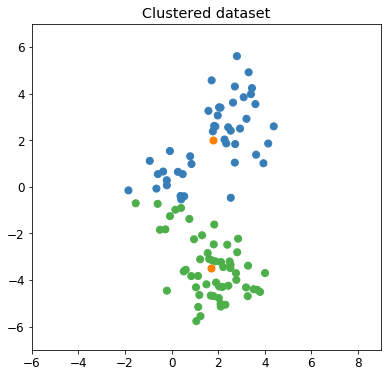

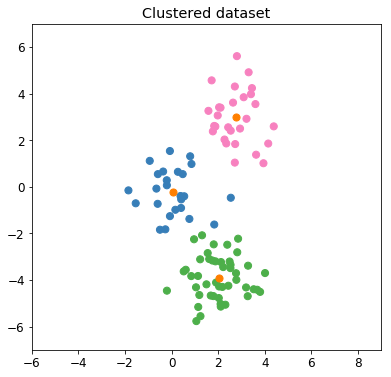

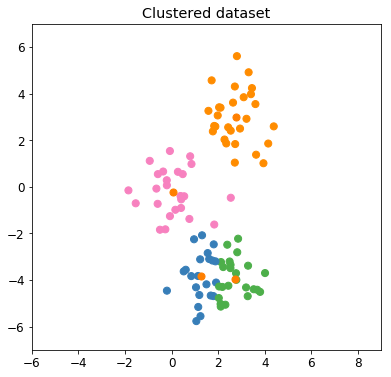

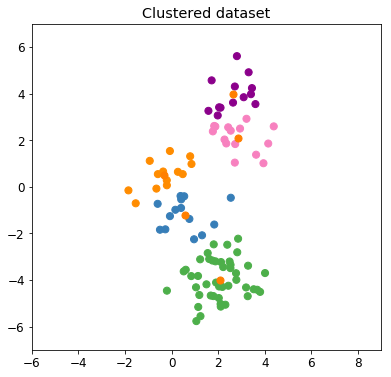

In [56]:
for i in [2,3,4,5]:
    centroids, assignments = runKmeans(i)
    plotClusters(centroids, assignments)